# The inner product distribution of a NxN randomly generated matrix

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

In [3]:
def generate(n):
    M = np.random.random((n, n)) - 0.5
    S = np.sum(M * M, axis=1).reshape((M.shape[0], 1))
    return M / np.sqrt(S)

In [4]:
def plot_hist(X, bins=1000):
    prob, edges = np.histogram(X, bins=bins)
    w = (edges[1] - edges[0]) * 0.5
    centers = edges[:-1] + w
    prob = prob * 1.0 / np.sum(prob)
    plt.bar(centers, prob, width=w)
    plt.show()


def show_dist(X):
    return pd.DataFrame(
        data=[X.mean(), np.std(X)],
        columns=['Value'],
        index=['Mean', 'STD']
    )

In [5]:
n = 2000
M = generate(n)
M_dot_M = np.dot(M, M.T)
M_dot_M_col = np.dot(M.T, M)

## Dots of Row Vectors

### i == j

In [6]:
indices = np.arange(M_dot_M.shape[0])
M_dot_M_diag = M_dot_M[indices, indices]
show_dist(M_dot_M_diag)

,Value
Mean,1.000000e+00
STD,1.897637e-16


### i != j

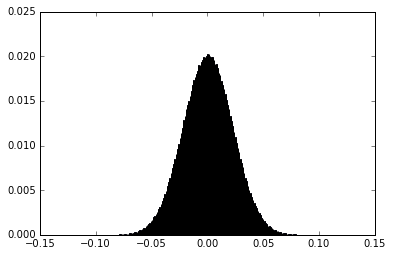

,Value
Mean,0.000021
STD,0.022357


In [7]:
M_dot_M_diag_removed = np.triu(M_dot_M, 1)[:-1] + np.tril(M_dot_M, -1)[1:]
dot_values = M_dot_M_diag_removed.reshape((M_dot_M_diag_removed.shape[0] * M_dot_M_diag_removed.shape[1], ))
plot_hist(dot_values, bins=200)
show_dist(dot_values)

## Dots of Column Vectors

### i == j

In [8]:
indices = np.arange(M_dot_M_col.shape[0])
M_dot_M_col_diag = M_dot_M_col[indices, indices]
show_dist(M_dot_M_col_diag)

,Value
Mean,1.000000
STD,0.019934


### i != j

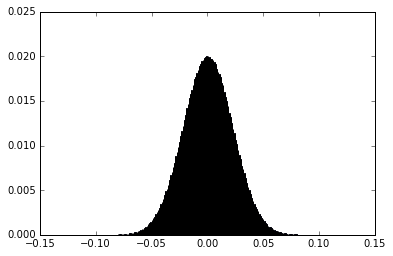

,Value
Mean,0.000016
STD,0.022353


In [9]:
M_dot_M_col_diag_removed = np.triu(M_dot_M_col, 1)[:-1] + np.tril(M_dot_M_col, -1)[1:]
dot_values = M_dot_M_col_diag_removed.reshape((M_dot_M_col_diag_removed.shape[0] * M_dot_M_col_diag_removed.shape[1], ))
plot_hist(dot_values, bins=200)
show_dist(dot_values)